<a href="https://colab.research.google.com/github/Fabeltranm/COMP9033/blob/master/ciencia_de_datos_y_pol_publicas_tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3

En esta Tarea 3 analizaremos el escenario de vacunación covid-19 en relación con la asistencia a clases en el sistema escolar chilenos entre marzo y junio 2022.

In [ ]:
#Importar nuestras biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# 1. Carga de conjunto de datos



## a. Cargar correctamente el conjunto de datos

In [ ]:
#Cargar la base que vamos a utilizar
vacunacion_asistencia = pd.read_csv("rendimiento21_asistencia21_vacunacion22_asistencia_marzo_junio22.csv",
                                   converters={'PROM_GRAL_2021':  lambda x : pd.to_numeric(x.replace(',','.'))})
#Ver cuantas dimensiones y registros contiene
vacunacion_asistencia.head()

,Unnamed: 0,RBD,cod_reg_rbd_2022,cod_com_rbd_2022,cod_depe2_2022,rural_rbd_2022,tipo_educacion,nom_grado,LET_CUR,porc_novacunados_27jun,...,GEN_ALU,FEC_NAC_ALU,PROM_GRAL_2021,ASISTENCIA_2021,SIT_FIN_2021,RBD_2021,COD_DEPE2_2021,RURAL_RBD_2021,COD_ENSE_2021,COD_GRADO_2021
0,0,5,15,15101,5,0,Educación Regular de Niños y Jóvenes,3° básico,A,13,...,1.0,201307.0,6.5,93.0,P,12694.0,2.0,0.0,110.0,2.0
1,1,5,15,15101,5,0,Educación Regular de Niños y Jóvenes,3° básico,A,13,...,1.0,201402.0,6.4,100.0,P,52.0,2.0,0.0,110.0,2.0
2,2,5,15,15101,5,0,Educación Regular de Niños y Jóvenes,3° básico,A,13,...,1.0,201307.0,6.6,98.0,P,5.0,5.0,0.0,110.0,2.0
3,3,5,15,15101,5,0,Educación Regular de Niños y Jóvenes,3° básico,A,13,...,1.0,201312.0,7.0,100.0,P,5.0,5.0,0.0,110.0,2.0
4,4,5,15,15101,5,0,Educación Regular de Niños y Jóvenes,3° básico,A,13,...,1.0,201312.0,6.9,98.0,P,5.0,5.0,0.0,110.0,2.0


## b. Realizar las transformaciones identificadas en el Taller 2

- i. Considerar sólo establecimientos educativos (EE) que reciben financiamiento público (cod_depe2_2022 distinto de 3).
- ii. Homologar escalas de asistencia a 0-100% (en lugar de 0-1).
- iii. Eliminar valor 0 en género alumno.
- iv. Eliminar registros sin fecha de nacimiento.
- v. Considerar edad máxima de 21 años

In [ ]:
# Consideramos sólo EE que reciben financiamiento público
vacunacion_asistencia = vacunacion_asistencia.loc[vacunacion_asistencia.cod_depe2_2022 != 3]
vacunacion_asistencia.cod_depe2_2022.replace({4:2,5:1}, inplace=True) # 1 = EE público / 2: EE privado subvencionado
# ajustar escala de asistencia
vacunacion_asistencia['ASIS_PROMEDIO_marzo'] = 100*vacunacion_asistencia.ASIS_PROMEDIO_marzo
vacunacion_asistencia['ASIS_PROMEDIO_junio'] = 100*vacunacion_asistencia.ASIS_PROMEDIO_junio
# Género alumno
vacunacion_asistencia.GEN_ALU.replace(0, np.nan, inplace=True)
# Eliminación filas sin fecha de nacimiento
vacunacion_asistencia.dropna(subset = ['FEC_NAC_ALU'], inplace=True)
# Considerar edad máxima de 21 años
vacunacion_asistencia = vacunacion_asistencia[2022 - vacunacion_asistencia.FEC_NAC_ALU.astype(str).str[:4].astype(int) <21]

# 2. Generar variables dummies (binarias) para: cod_depe2_2022 y GEN_ALU.


## a. Transformar en variable binaria la columna cod_depe2_2022.
## b. Transformar en variable binaria la columna GEN_ALU.


In [ ]:
# Generar dummies
for column in ['cod_depe2_2022', 'GEN_ALU']:
    print(column)
    X_dummies = pd.get_dummies(vacunacion_asistencia[column], prefix= column)
    vacunacion_asistencia = pd.concat([vacunacion_asistencia,X_dummies], axis=1)

vacunacion_asistencia.head()



cod_depe2_2022
GEN_ALU


,Unnamed: 0,RBD,cod_reg_rbd_2022,cod_com_rbd_2022,cod_depe2_2022,rural_rbd_2022,tipo_educacion,nom_grado,LET_CUR,porc_novacunados_27jun,...,SIT_FIN_2021,RBD_2021,COD_DEPE2_2021,RURAL_RBD_2021,COD_ENSE_2021,COD_GRADO_2021,cod_depe2_2022_1,cod_depe2_2022_2,GEN_ALU_1.0,GEN_ALU_2.0
0,0,5,15,15101,1,0,Educación Regular de Niños y Jóvenes,3° básico,A,13,...,P,12694.0,2.0,0.0,110.0,2.0,1,0,1,0
1,1,5,15,15101,1,0,Educación Regular de Niños y Jóvenes,3° básico,A,13,...,P,52.0,2.0,0.0,110.0,2.0,1,0,1,0
2,2,5,15,15101,1,0,Educación Regular de Niños y Jóvenes,3° básico,A,13,...,P,5.0,5.0,0.0,110.0,2.0,1,0,1,0
3,3,5,15,15101,1,0,Educación Regular de Niños y Jóvenes,3° básico,A,13,...,P,5.0,5.0,0.0,110.0,2.0,1,0,1,0
4,4,5,15,15101,1,0,Educación Regular de Niños y Jóvenes,3° básico,A,13,...,P,5.0,5.0,0.0,110.0,2.0,1,0,1,0


# 3. Agrupar conjunto de datos a nivel de sala de clases,
las que son identificadas por la tupla  (RBD, nom_grado, LET_CUR). Mantener las variables descritas a continuación:


-	ASIS_PROMEDIO_junio
-	ASIS_PROMEDIO_marzo
-	porc_vacu_22mayo
-	cod_depe2_2022_1
-	GEN_ALU_1
-	PROM_GRAL_2021
-	ASISTENCIA_2021

In [ ]:
# Agrupar
df_agrupar = vacunacion_asistencia[['RBD', 'nom_grado','LET_CUR', 'ASIS_PROMEDIO_junio', 'ASIS_PROMEDIO_marzo',
                                    'porc_vacu_22mayo', 'cod_depe2_2022_1','GEN_ALU_1.0','PROM_GRAL_2021',
                                    'ASISTENCIA_2021']]


df_agrupado = df_agrupar.groupby(['RBD', 'nom_grado', 'LET_CUR']).agg(
    ASIS_PROMEDIO_junio = ('ASIS_PROMEDIO_junio', 'mean'),
    ASIS_PROMEDIO_marzo = ('ASIS_PROMEDIO_marzo', 'mean'),
    porc_vacu_22mayo    = ('porc_vacu_22mayo', 'mean'),
    cod_depe2_2022_1    = ('cod_depe2_2022_1', 'median'),
    GEN_ALU_1           = ('GEN_ALU_1.0', 'sum'),
    PROM_GRAL_2021      = ('PROM_GRAL_2021', 'mean'),
    ASISTENCIA_2021     = ('ASISTENCIA_2021','mean')
)

df_agrupado


ASIS_PROMEDIO_junio  ASIS_PROMEDIO_marzo  \
RBD   nom_grado LET_CUR                                             
5     2° básico A                  80.829630            85.979630   
      3° básico A                  78.781786            81.632143   
      4° básico A                  85.185556            88.624815   
      5° básico A                  79.739259            90.211481   
      6° básico A                  74.314667            81.667333   
...                                      ...                  ...   
41899 7° básico A                 100.000000            98.029333   
      8° básico A                  99.326061            98.484242   
41947 2° básico A                 100.000000           100.000000   
41955 7° básico A                 100.000000            75.756667   
      8° básico A                 100.000000           100.000000   

                         porc_vacu_22mayo  cod_depe2_2022_1  GEN_ALU_1  \
RBD   nom_grado LET_CUR                                                  
5     2° básico A                    68.0               1.0         12   
      3° básico A                    73.0               1.0         20   
      4° básico A                    85.0               1.0         14   
      5° básico A                    89.0               1.0         18   
      6° básico A                    83.0               1.0         20   
...                                   ...               ...        ...   
41899 7° básico A                    93.0               0.0         16   
      8° básico A                   100.0               0.0         19   
41947 2° básico A                    80.0               0.0          2   
41955 7° básico A                    67.0               0.0          3   
      8° básico A                    70.0               0.0          3   

                         PROM_GRAL_2021  ASISTENCIA_2021  
RBD   nom_grado LET_CUR                                   
5     2° básico A              6.425926        95.740741  
      3° básico A              6.435714        95.035714  
      4° básico A              6.548148        94.555556  
      5° básico A              6.422222        94.962963  
      6° básico A              6.366667        95.400000  
...                                 ...              ...  
41899 7° básico A              6.293333        97.200000  
      8° básico A              6.230303        98.939394  
41947 2° básico A              6.766667       100.000000  
41955 7° básico A              6.300000        93.333333  
      8° básico A              6.533333       100.000000  

[54508 rows x 7 columns]

In [ ]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 54508 entries, (5, '2° básico', 'A') to (41955, '8° básico', 'A')
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASIS_PROMEDIO_junio  54508 non-null  float64
 1   ASIS_PROMEDIO_marzo  54508 non-null  float64
 2   porc_vacu_22mayo     54508 non-null  float64
 3   cod_depe2_2022_1     54508 non-null  float64
 4   GEN_ALU_1            54508 non-null  uint8  
 5   PROM_GRAL_2021       54508 non-null  float64
 6   ASISTENCIA_2021      54508 non-null  float64
dtypes: float64(6), uint8(1)
memory usage: 2.8+ MB


#4 Predecir ASIS_PROMEDIO_junio
A nivel de sala de clases, utilizando un algoritmo de  regresión diferente a la regresión lineal. Evaluar modelos con métricas RMSE y MAE, sobre un conjunto de testeo de tamaño 20% de la muestra.

- a. Separar los datos en muestra de prueba y validación según lo indicado.
- b. Entrenar un modelo de regresión. para regresion polinomial de diferentes grados el mejor es grado 4
- c. Evaluar el desempeño de acuerdo a las métricas indicadas.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# definir predictores y variable a predecir
X = df_agrupado.drop(columns=['ASIS_PROMEDIO_junio'])
y = df_agrupado.ASIS_PROMEDIO_junio

# Generamos la división entre la muestra de entrenamiento (train) y prueba (test) e iniciamos el generador aleatorio
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Entrenamos el modelo con los datos correspondientes

for grado in [1,2,3, 4 ,5, 6 ,7]:
   polinomizador = PolynomialFeatures(degree=grado)
   X_poli_train = polinomizador.fit_transform(X_train)
   X_poli_test = polinomizador.fit_transform(X_test)

   regresor_polinomico = LinearRegression()
   regresor_polinomico.fit(X_poli_train, y_train)

   y_pred = regresor_polinomico.predict(X_poli_test)

   mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred)
   mse=metrics.mean_squared_error(y_test, y_pred)
   print('grado: ', grado)
   print('MAE: ', round(mean_absolute_error,4))
   print('RMSE: ', round(np.sqrt(mse),4))


polinomizador = PolynomialFeatures(degree=4)
X_poli_train = polinomizador.fit_transform(X_train)
X_poli_test = polinomizador.fit_transform(X_test)

regresor_polinomico = LinearRegression()
regresor_polinomico.fit(X_poli_train, y_train)

y_pred = regresor_polinomico.predict(X_poli_test)

mean_absolute_error1=metrics.mean_absolute_error(y_test, y_pred)
mse1=metrics.mean_squared_error(y_test, y_pred)
print('MAE 1: ', round(mean_absolute_error1,4))
print('RMSE 1: ', round(np.sqrt(mse1),4))




grado:  1
MAE:  7.0741
RMSE:  10.3451
grado:  2
MAE:  6.8247
RMSE:  10.0789
grado:  3
MAE:  6.7553
RMSE:  10.0091
grado:  4
MAE:  6.6928
RMSE:  9.914
grado:  5
MAE:  6.7234
RMSE:  9.9606
grado:  6
MAE:  6.8061
RMSE:  10.423
grado:  7
MAE:  7.1805
RMSE:  19.2997


In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 54508 entries, (5, '2° básico', 'A') to (41955, '8° básico', 'A')
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASIS_PROMEDIO_marzo  54508 non-null  float64
 1   porc_vacu_22mayo     54508 non-null  float64
 2   cod_depe2_2022_1     54508 non-null  float64
 3   GEN_ALU_1            54508 non-null  uint8  
 4   PROM_GRAL_2021       54508 non-null  float64
 5   ASISTENCIA_2021      54508 non-null  float64
dtypes: float64(5), uint8(1)
memory usage: 2.4+ MB


#5. Clusterización
- a. Seleccionar dos columnas para construir clusters.
- b. Ajustar un algoritmo de clusterización sobre los datos.
- c. Identificar y justificar los parámetros idóneos para el algoritmo.
- d. Evaluar el resultado del modelo de clusterización con al menos una
métrica.
- e.  Construir un gráfico para visualizar los clusters según lo indicado.

## - a. Seleccionar dos columnas para construir clusters.

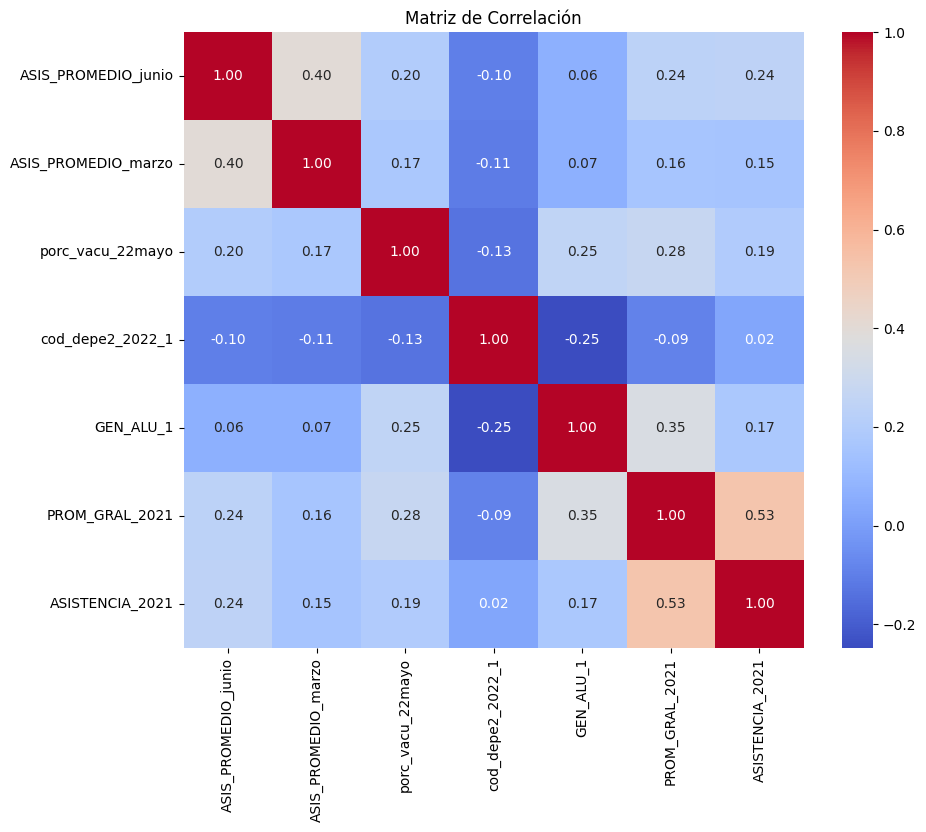

['ASIS_PROMEDIO_junio', 'ASIS_PROMEDIO_marzo', 'porc_vacu_22mayo', 'cod_depe2_2022_1', 'GEN_ALU_1', 'PROM_GRAL_2021', 'ASISTENCIA_2021']


In [ ]:
import seaborn as sns


# Calcular la matriz de correlación
matriz_correlacion = df_agrupado.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()

print(df_agrupado.columns.tolist())


In [ ]:
plt.figure(figsize=(5, 5))
Caracteristicas =['ASIS_PROMEDIO_marzo', 'ASISTENCIA_2021']
Caracteristicas =['ASIS_PROMEDIO_marzo', 'PROM_GRAL_2021']
#sns.scatterplot(data=df_agrupado, x=Caracteristicas[0], y=Caracteristicas[1], hue='ASIS_PROMEDIO_junio', palette='viridis')
sns.scatterplot(data=df_agrupado, x=Caracteristicas[0], y=Caracteristicas[1])

plt.show()

## b. Ajustar un algoritmo de clusterización sobre los datos.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

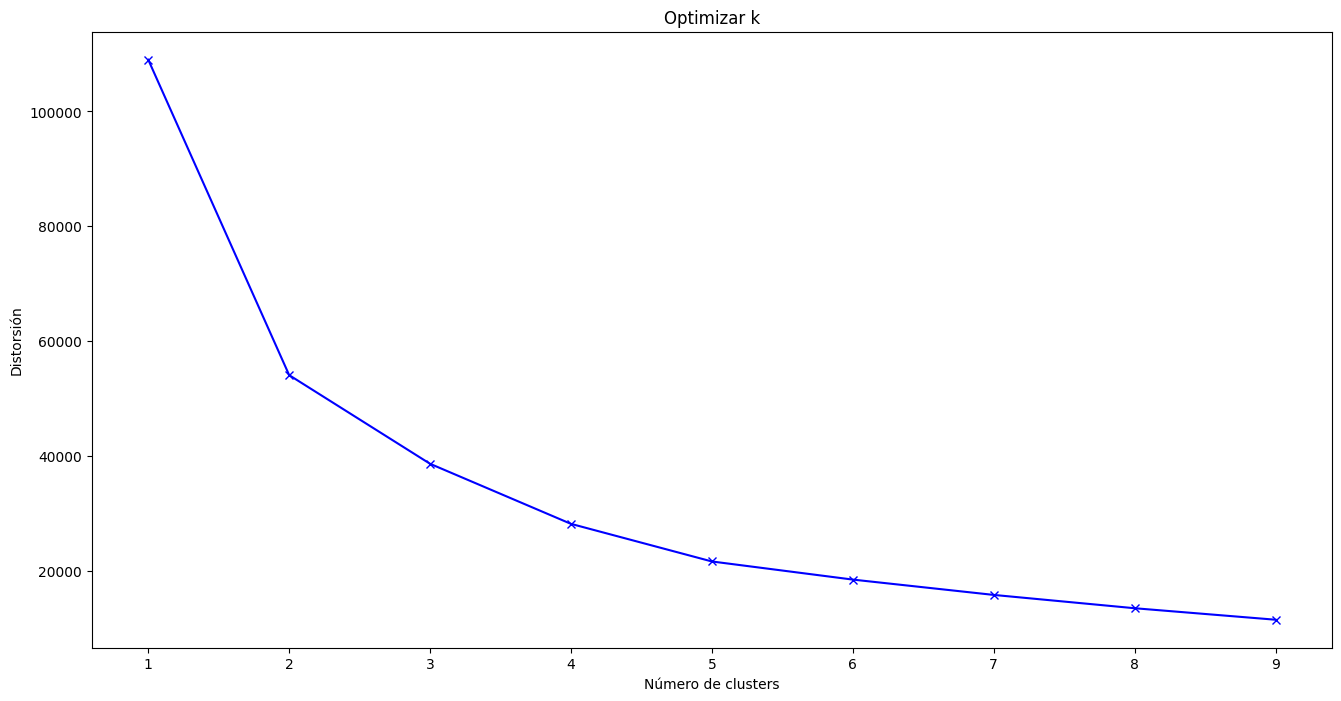

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables para el clustering
X_clustering = df_agrupado[Caracteristicas].dropna()

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Método del codo para encontrar el número óptimo de clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.title('Optimizar k')
plt.show()


## c. Identificar y justificar los parámetros idóneos para el algoritmo.

según el metodo del codo el mejor k sera 2 o 3 por lo tanto hacemos el cluster con k=3 y k=4

## d. Evaluar el resultado del modelo de clusterización con al menos una métrica.

pero al validar el coeficiente de silueta del clustering es, resulta mejor k =3


In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

labels = kmeans.labels_

# Coeficiente de Silueta
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"El coeficiente de silueta del clustering es: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


El coeficiente de silueta del clustering es: 0.7223443058106684


## e.  Construir un gráfico para visualizar los clusters según lo indicado.


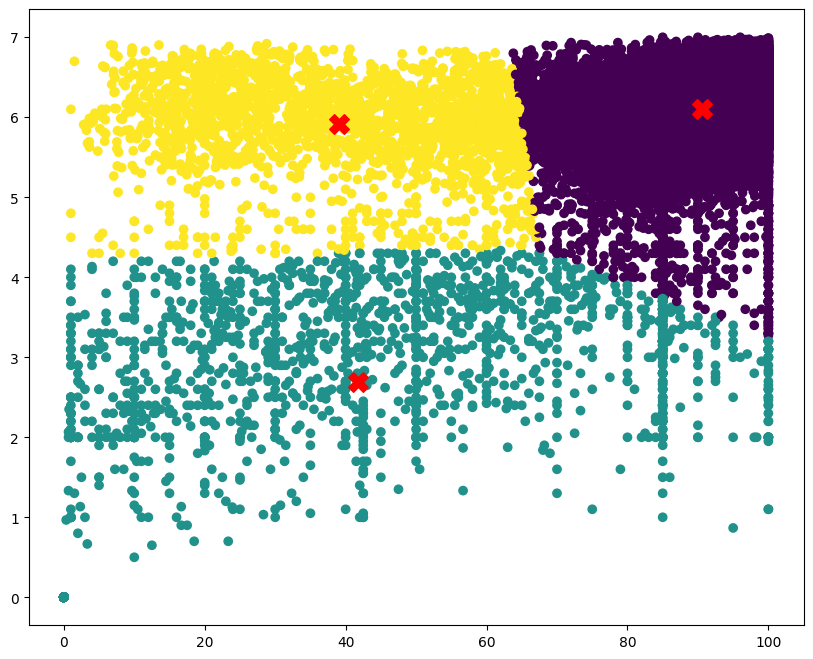

In [36]:
# Visualizar los clusters
centroids = kmeans.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids)
plt.figure(figsize=(10, 8))
plt.scatter(X_clustering[Caracteristicas[0]], X_clustering[Caracteristicas[1]], c=labels, cmap='viridis')
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], marker='X', s=200, c='red')


#6 Predecir ASIS_PROMEDIO_junio,
a nivel de sala de clases, utilizando el mismo algoritmo
que en el enunciado 4 y con una misma selección muestral, pero reemplazando los predictores seleccionados en el enunciado 5 por el label obtenido de la clusterización, si le parece necesario, puede aplicar codificación con variables dummy

- a. Separar los datos en muestra de prueba y validación según lo indicado.
- b. Entrenar un segundo modelo de regresión empleando el mismo algoritmo
que en el punto 4.
- c. Evaluar el desempeño de acuerdo a las métricas indicadas.

In [37]:
df_agrupado['cluster_label'] = kmeans.fit_predict(df_agrupado[Caracteristicas])

# Codificación con variables dummy
cluster_dummies = pd.get_dummies(df_agrupado['cluster_label'], prefix='cluster')

# definir predictores y variable a predecir
X = pd.concat([df_agrupado.drop(columns=['ASIS_PROMEDIO_junio','cluster_label']+Caracteristicas), cluster_dummies], axis=1)
y = df_agrupado.ASIS_PROMEDIO_junio
print(df_agrupado.info())
print(X.info())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 54508 entries, (5, '2° básico', 'A') to (41955, '8° básico', 'A')
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASIS_PROMEDIO_junio  54508 non-null  float64
 1   ASIS_PROMEDIO_marzo  54508 non-null  float64
 2   porc_vacu_22mayo     54508 non-null  float64
 3   cod_depe2_2022_1     54508 non-null  float64
 4   GEN_ALU_1            54508 non-null  uint8  
 5   PROM_GRAL_2021       54508 non-null  float64
 6   ASISTENCIA_2021      54508 non-null  float64
 7   cluster_label        54508 non-null  int32  
dtypes: float64(6), int32(1), uint8(1)
memory usage: 3.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 54508 entries, (5, '2° básico', 'A') to (41955, '8° básico', 'A')
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASIS_PROMEDIO_marzo  54508 non-nu

## a. Separar los datos en muestra de prueba y validación según lo indicado.

In [38]:
# Generamos la división entre la muestra de entrenamiento (train) y prueba (test) e iniciamos el generador aleatorio
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## b. Entrenar un segundo modelo de regresión empleando el mismo algoritmo que en el punto 4.

In [39]:
polinomizador = PolynomialFeatures(degree=4)
X_poli_train = polinomizador.fit_transform(X_train)
X_poli_test = polinomizador.fit_transform(X_test)

regresor_polinomico = LinearRegression()
regresor_polinomico.fit(X_poli_train, y_train)

y_pred = regresor_polinomico.predict(X_poli_test)



# c. Evaluar el desempeño de acuerdo a las métricas indicadas.

In [45]:
mean_absolute_error2=metrics.mean_absolute_error(y_test, y_pred)
mse2=metrics.mean_squared_error(y_test, y_pred)
print('MAE Modelo 2: ', round(mean_absolute_error2,4))
print('RMSE Modelo 2: ', round(np.sqrt(mse2),4))

MAE:  6.757
RMSE:  10.0154
